In [16]:
import pandas as pd
import os

wd = '/Users/rem76/PycharmProjects/TLOmodel/outputs/rm916@ic.ac.uk/climate_scenario_runs_baseline-2025-12-04T163755Z/'
os.chdir(wd)

# Read the three files
baseline = pd.read_csv('1_Final_Coarse_Treatments_main_text_HSI_Event.csv')
delayed = pd.read_csv('1_Final_Coarse_Treatments_main_text_Weather_delayed_HSI_Event_full_info.csv')
cancelled = pd.read_csv('1_Final_Coarse_Treatments_main_text_Weather_cancelled_HSI_Event_full_info.csv')

# Rename the 'Unnamed: 0' column to 'HSI_name' for clarity
baseline = baseline.rename(columns={'Unnamed: 0': 'HSI_name'})
delayed = delayed.rename(columns={'Unnamed: 0': 'HSI_name'})
cancelled = cancelled.rename(columns={'Unnamed: 0': 'HSI_name'})

# Rename the value columns to indicate their source
baseline_clean = baseline.rename(columns={
    'Baseline': 'Baseline_Baseline',
    'SSP2-4.5': 'Baseline_SSP2-4.5'
})

delayed_clean = delayed.rename(columns={
    'Baseline': 'Delayed_Baseline',
    'SSP2-4.5': 'Delayed_SSP2-4.5'
})

cancelled_clean = cancelled.rename(columns={
    'Baseline': 'Cancelled_Baseline',
    'SSP2-4.5': 'Cancelled_SSP2-4.5'
})

# Merge all three datasets on HSI_name
merged = baseline_clean.merge(delayed_clean, on='HSI_name', how='outer')
merged = merged.merge(cancelled_clean, on='HSI_name', how='outer')

# Fill NaN with 0 (these are HSIs that don't appear in all files)
merged = merged.fillna(0)

# Reorder columns for better readability
column_order = [
    'HSI_name',
    'Baseline_Baseline', 'Baseline_SSP2-4.5',
    'Delayed_Baseline', 'Delayed_SSP2-4.5',
    'Cancelled_Baseline', 'Cancelled_SSP2-4.5'
]
merged = merged[column_order]

# Sort by HSI_name
merged = merged.sort_values('HSI_name').reset_index(drop=True)


# Summary statistics
print("\n" + "="*80)
print("SUMMARY STATISTICS")
print("="*80)

print(f"\nTotal unique HSI types: {len(merged)}")
print(f"HSI types in baseline file: {len(baseline)}")
print(f"HSI types in delayed file: {len(delayed)}")
print(f"HSI types in cancelled file: {len(cancelled)}")

# Calculate proportions (delayed/cancelled as % of baseline)
# Avoid division by zero

merged['Delayed_Prop_SSP2-4.5'] = merged.apply(
    lambda row: (row['Delayed_SSP2-4.5'] / row['Baseline_SSP2-4.5'] * 100) 
    if row['Baseline_SSP2-4.5'] > 0 else 0, axis=1
)

merged['Cancelled_Prop_SSP2-4.5'] = merged.apply(
    lambda row: (row['Cancelled_SSP2-4.5'] / row['Baseline_SSP2-4.5'] * 100) 
    if row['Baseline_SSP2-4.5'] > 0 else 0, axis=1
)

merged['Cancelled_Impact_SSP2-4.5'] = merged['Cancelled_SSP2-4.5']

# Save the enhanced version with proportions
merged.to_csv('merged_HSI_with_proportions.csv', index=False)

top_delayed_prop = merged.nlargest(10, 'Delayed_Prop_SSP2-4.5')[
    ['HSI_name', 'Baseline_SSP2-4.5', 'Delayed_SSP2-4.5', 'Delayed_Prop_SSP2-4.5']
]
top_delayed_prop['Delayed_Prop_SSP2-4.5'] = top_delayed_prop['Delayed_Prop_SSP2-4.5'].map('{:.2f}%'.format)
print(top_delayed_prop.to_string(index=False))

print("\nTop 10 HSIs by cancelled proportion (SSP2.45 scenario):")
top_cancelled_prop = merged.nlargest(10, 'Cancelled_Prop_SSP2-4.5')[
    ['HSI_name', 'Baseline_SSP2-4.5', 'Cancelled_SSP2-4.5', 'Cancelled_Prop_SSP2-4.5']
]
top_cancelled_prop['Cancelled_Prop_SSP2-4.5'] = top_cancelled_prop['Cancelled_Prop_SSP2-4.5'].map('{:.2f}%'.format)
print(top_cancelled_prop.to_string(index=False))



SUMMARY STATISTICS

Total unique HSI types: 66
HSI types in baseline file: 66
HSI types in delayed file: 52
HSI types in cancelled file: 49
                        HSI_name  Baseline_SSP2-4.5  Delayed_SSP2-4.5 Delayed_Prop_SSP2-4.5
           Depression_Treatment*       7.009545e+04      10206.805518                14.56%
      Depression_TalkingTherapy*       1.954705e+05      11079.182058                 5.67%
  CervicalCancer_PalliativeCare*       3.387729e+03        145.396090                 4.29%
    BreastCancer_PalliativeCare*       1.693864e+04        232.633744                 1.37%
    BladderCancer_Investigation*       2.507501e+05       2428.114703                 0.97%
OesophagealCancer_Investigation*       8.488224e+04        785.138886                 0.92%
      FirstAttendance_Emergency*       2.346156e+07     188840.441692                 0.80%
   ProstateCancer_Investigation*       2.005012e+05       1468.500509                 0.73%
             Epilepsy_Treatment

In [17]:
merged

,HSI_name,Baseline_Baseline,Baseline_SSP2-4.5,Delayed_Baseline,Delayed_SSP2-4.5,Cancelled_Baseline,Cancelled_SSP2-4.5,Delayed_Prop_SSP2-4.5,Cancelled_Prop_SSP2-4.5,Cancelled_Impact_SSP2-4.5
0,Alri_Pneumonia*,1.206959e+07,1.232841e+07,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,AntenatalCare_FollowUp*,9.412070e+05,9.471683e+05,0.0,290.792180,0.0,334.411007,0.030701,0.035306,334.411007
2,AntenatalCare_Inpatient*,9.144920e+06,9.284398e+06,0.0,24339.305466,0.0,28526.712858,0.262153,0.307254,28526.712858
3,AntenatalCare_Outpatient*,4.690440e+07,4.801265e+07,0.0,10308.582781,0.0,16560.614651,0.021471,0.034492,16560.614651
4,AntenatalCare_PostAbortion*,8.871779e+05,9.140616e+05,0.0,2995.159454,0.0,3067.857499,0.327676,0.335629,3067.857499
...,...,...,...,...,...,...,...,...,...,...
61,Tb_Prevention*,4.099981e+06,4.104648e+06,0.0,581.584360,0.0,930.534976,0.014169,0.022670,930.534976
62,Tb_Test*,1.837440e+08,1.843738e+08,0.0,33964.526624,0.0,51935.483348,0.018422,0.028169,51935.483348
63,Tb_Treatment*,5.779785e+05,5.762047e+05,0.0,381.664736,0.0,193.861453,0.066238,0.033645,193.861453
64,Undernutrition_Feeding*,1.205850e+07,1.228302e+07,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


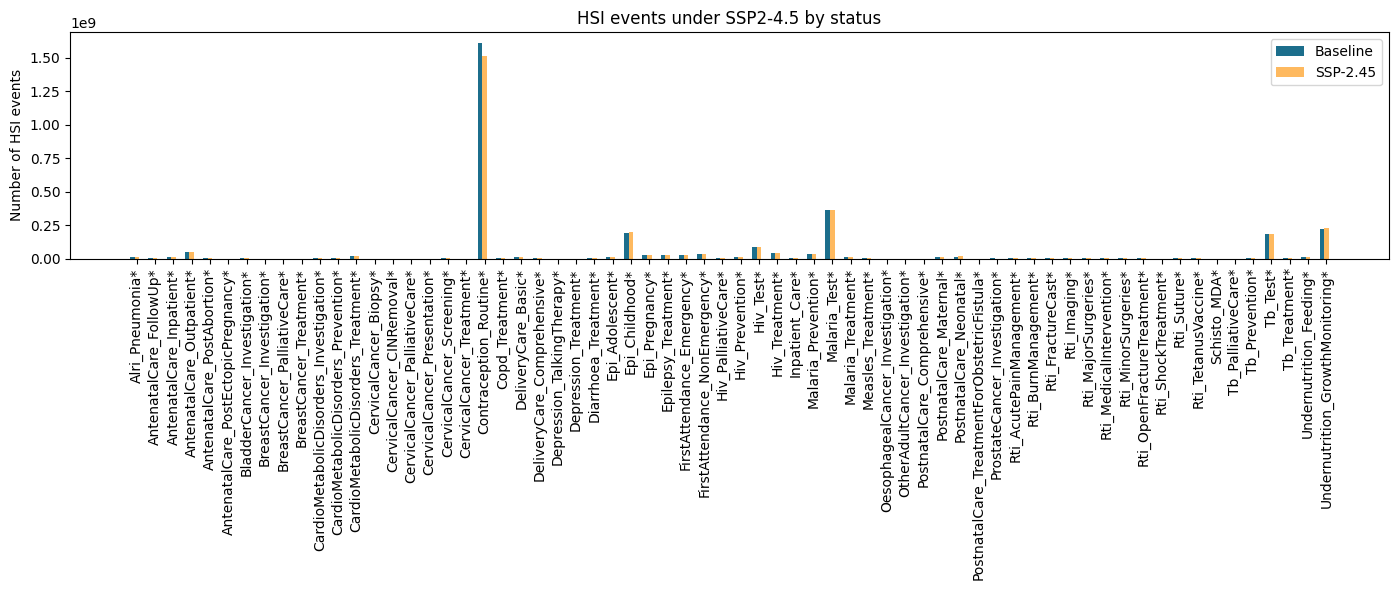

In [29]:
import numpy as np
from matplotlib import pyplot as plt

# Data
hsi = merged['HSI_name']
x = np.arange(len(hsi))
width = 0.25

# Preferred colours
colors = {
    'Baseline': '#1C6E8C',
    'SSP-2.45': '#FEB95F',
}

plt.figure(figsize=(14, 6))

plt.bar(
    x - width,
    merged['Baseline_Baseline'],
    width,
    label='Baseline',
    color=colors['Baseline']
)

plt.bar(
    x,
    merged['Baseline_SSP2-4.5'],
    width,
    label='SSP-2.45',
    color=colors['SSP-2.45']
)


plt.xticks(x, hsi, rotation=90)
plt.ylabel('Number of HSI events')
plt.title('HSI events under SSP2-4.5 by status')
plt.legend()
plt.tight_layout()
plt.show()

In [28]:
merged

,HSI_name,Baseline_Baseline,Baseline_SSP2-4.5,Delayed_Baseline,Delayed_SSP2-4.5,Cancelled_Baseline,Cancelled_SSP2-4.5,Delayed_Prop_SSP2-4.5,Cancelled_Prop_SSP2-4.5,Cancelled_Impact_SSP2-4.5
0,Alri_Pneumonia*,1.206959e+07,1.232841e+07,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,AntenatalCare_FollowUp*,9.412070e+05,9.471683e+05,0.0,290.792180,0.0,334.411007,0.030701,0.035306,334.411007
2,AntenatalCare_Inpatient*,9.144920e+06,9.284398e+06,0.0,24339.305466,0.0,28526.712858,0.262153,0.307254,28526.712858
3,AntenatalCare_Outpatient*,4.690440e+07,4.801265e+07,0.0,10308.582781,0.0,16560.614651,0.021471,0.034492,16560.614651
4,AntenatalCare_PostAbortion*,8.871779e+05,9.140616e+05,0.0,2995.159454,0.0,3067.857499,0.327676,0.335629,3067.857499
...,...,...,...,...,...,...,...,...,...,...
61,Tb_Prevention*,4.099981e+06,4.104648e+06,0.0,581.584360,0.0,930.534976,0.014169,0.022670,930.534976
62,Tb_Test*,1.837440e+08,1.843738e+08,0.0,33964.526624,0.0,51935.483348,0.018422,0.028169,51935.483348
63,Tb_Treatment*,5.779785e+05,5.762047e+05,0.0,381.664736,0.0,193.861453,0.066238,0.033645,193.861453
64,Undernutrition_Feeding*,1.205850e+07,1.228302e+07,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


In [33]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

wd = '/Users/rem76/PycharmProjects/TLOmodel/outputs/rm916@ic.ac.uk/climate_scenario_runs_baseline-2025-12-04T163755Z/'
os.chdir(wd)

# Read the mean values (as before)
baseline = pd.read_csv('1_Final_Coarse_Treatments_main_text_HSI_Event.csv')
delayed = pd.read_csv('1_Final_Coarse_Treatments_main_text_Weather_delayed_HSI_Event_full_info.csv')
cancelled = pd.read_csv('1_Final_Coarse_Treatments_main_text_Weather_cancelled_HSI_Event_full_info.csv')

# NEW: Read confidence intervals
baseline_ci_baseline = pd.read_csv('1_CI_HSI_Event_Baseline.csv')
baseline_ci_ssp = pd.read_csv('1_CI_HSI_Event_SSP24.5.csv')
delayed_ci_ssp = pd.read_csv('1_CI_Weather_delayed_HSI_Event_full_info_SSP24.5.csv')
cancelled_ci_ssp = pd.read_csv('1_CI_Weather_cancelled_HSI_Event_full_info_SSP24.5.csv')

# Rename columns
baseline = baseline.rename(columns={'Unnamed: 0': 'HSI_name'})
delayed = delayed.rename(columns={'Unnamed: 0': 'HSI_name'})
cancelled = cancelled.rename(columns={'Unnamed: 0': 'HSI_name'})

# Create a comprehensive merged dataset with CIs
merged = baseline.rename(columns={
    'Baseline': 'Baseline_Baseline_mean',
    'SSP2-4.5': 'Baseline_SSP245_mean'
})

# Merge baseline CIs
baseline_ci_baseline_renamed = baseline_ci_baseline.rename(columns={
    'mean': 'Baseline_Baseline_mean_check',
    'lower': 'Baseline_Baseline_lower',
    'upper': 'Baseline_Baseline_upper'
})
merged = merged.merge(baseline_ci_baseline_renamed[['HSI_name', 'Baseline_Baseline_lower', 'Baseline_Baseline_upper']], 
                      on='HSI_name', how='outer')

baseline_ci_ssp_renamed = baseline_ci_ssp.rename(columns={
    'mean': 'Baseline_SSP245_mean_check',
    'lower': 'Baseline_SSP245_lower',
    'upper': 'Baseline_SSP245_upper'
})
merged = merged.merge(baseline_ci_ssp_renamed[['HSI_name', 'Baseline_SSP245_lower', 'Baseline_SSP245_upper']], 
                      on='HSI_name', how='outer')

# Merge delayed data and CIs
delayed_renamed = delayed.rename(columns={'SSP2-4.5': 'Delayed_SSP245_mean'})
merged = merged.merge(delayed_renamed[['HSI_name', 'Delayed_SSP245_mean']], on='HSI_name', how='outer')

delayed_ci_ssp_renamed = delayed_ci_ssp.rename(columns={
    'mean': 'Delayed_SSP245_mean_check',
    'lower': 'Delayed_SSP245_lower',
    'upper': 'Delayed_SSP245_upper'
})
merged = merged.merge(delayed_ci_ssp_renamed[['HSI_name', 'Delayed_SSP245_lower', 'Delayed_SSP245_upper']], 
                      on='HSI_name', how='outer')

# Merge cancelled data and CIs
cancelled_renamed = cancelled.rename(columns={'SSP2-4.5': 'Cancelled_SSP245_mean'})
merged = merged.merge(cancelled_renamed[['HSI_name', 'Cancelled_SSP245_mean']], on='HSI_name', how='outer')

cancelled_ci_ssp_renamed = cancelled_ci_ssp.rename(columns={
    'mean': 'Cancelled_SSP245_mean_check',
    'lower': 'Cancelled_SSP245_lower',
    'upper': 'Cancelled_SSP245_upper'
})
merged = merged.merge(cancelled_ci_ssp_renamed[['HSI_name', 'Cancelled_SSP245_lower', 'Cancelled_SSP245_upper']], 
                      on='HSI_name', how='outer')

# Fill NaN with 0
merged = merged.fillna(0)

# Calculate proportions with CIs
merged['Delayed_Prop_SSP245'] = merged.apply(
    lambda row: (row['Delayed_SSP245_mean'] / row['Baseline_SSP245_mean'] * 100) 
    if row['Baseline_SSP245_mean'] > 0 else 0, axis=1
)

merged['Cancelled_Prop_SSP245'] = merged.apply(
    lambda row: (row['Cancelled_SSP245_mean'] / row['Baseline_SSP245_mean'] * 100) 
    if row['Baseline_SSP245_mean'] > 0 else 0, axis=1
)

# Save comprehensive merged data
merged.to_csv('merged_HSI_with_CIs.csv', index=False)

print("\n" + "="*80)
print("DATA WITH CONFIDENCE INTERVALS SAVED")
print("="*80)
print(f"\nTotal unique HSI types: {len(merged)}")
print("\nColumns saved:")
print(merged.columns.tolist())




DATA WITH CONFIDENCE INTERVALS SAVED

Total unique HSI types: 66

Columns saved:
['HSI_name', 'Baseline_Baseline_mean', 'Baseline_SSP245_mean', 'Baseline_Baseline_lower', 'Baseline_Baseline_upper', 'Baseline_SSP245_lower', 'Baseline_SSP245_upper', 'Delayed_SSP245_mean', 'Delayed_SSP245_lower', 'Delayed_SSP245_upper', 'Cancelled_SSP245_mean', 'Cancelled_SSP245_lower', 'Cancelled_SSP245_upper', 'Delayed_Prop_SSP245', 'Cancelled_Prop_SSP245']

Plot saved: top_10_delayed_with_CI.png


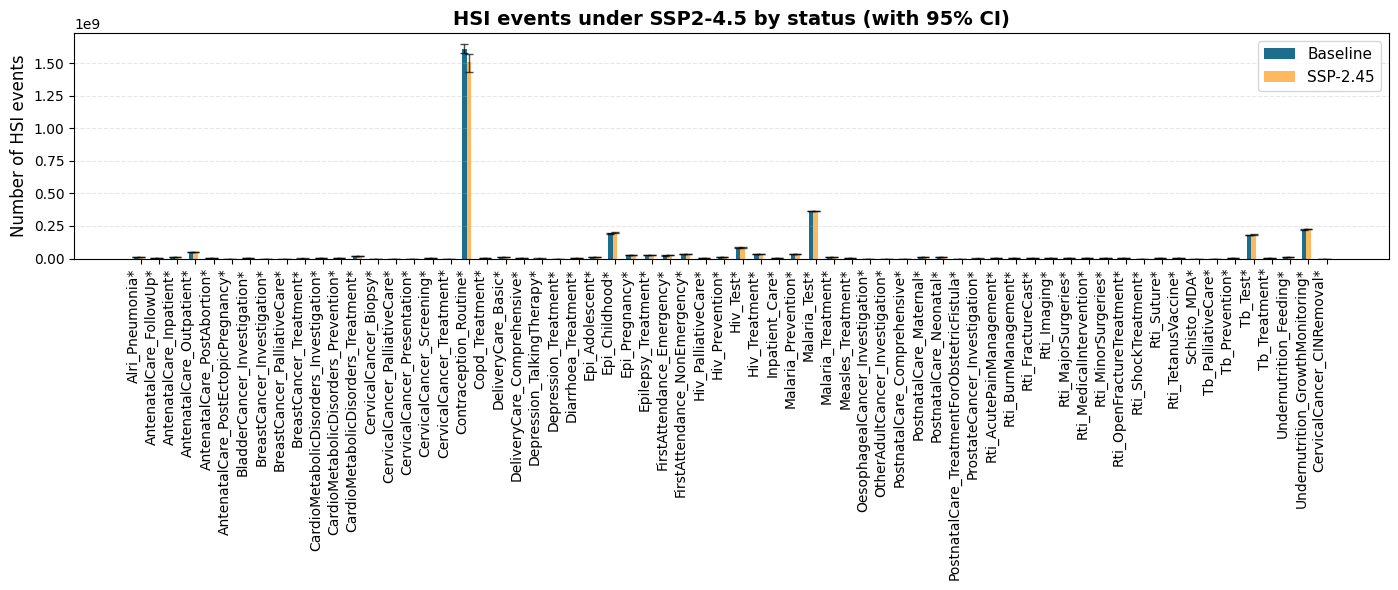

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data
hsi = merged['HSI_name']
x = np.arange(len(hsi))
width = 0.25

# Preferred colours
colors = {
    'Baseline': '#1C6E8C',
    'SSP-2.45': '#FEB95F',
}

# Calculate error bars (distance from mean to lower/upper bounds)
baseline_errors = [
    merged['Baseline_Baseline_mean'] - merged['Baseline_Baseline_lower'],  # lower error
    merged['Baseline_Baseline_upper'] - merged['Baseline_Baseline_mean']   # upper error
]

ssp245_errors = [
    merged['Baseline_SSP245_mean'] - merged['Baseline_SSP245_lower'],  # lower error
    merged['Baseline_SSP245_upper'] - merged['Baseline_SSP245_mean']   # upper error
]

plt.figure(figsize=(14, 6))

# Baseline bars with error bars
plt.bar(
    x - width,
    merged['Baseline_Baseline_mean'],
    width,
    label='Baseline',
    color=colors['Baseline'],
    yerr=baseline_errors,
    capsize=3,
    error_kw={'elinewidth': 1, 'alpha': 0.7}
)

# SSP2-4.5 bars with error bars
plt.bar(
    x,
    merged['Baseline_SSP245_mean'],
    width,
    label='SSP-2.45',
    color=colors['SSP-2.45'],
    yerr=ssp245_errors,
    capsize=3,
    error_kw={'elinewidth': 1, 'alpha': 0.7}
)

plt.xticks(x, hsi, rotation=90, ha='right')
plt.ylabel('Number of HSI events', fontsize=12)
plt.title('HSI events under SSP2-4.5 by status (with 95% CI)', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('HSI_events_comparison_with_CI.png', dpi=300, bbox_inches='tight')
plt.show()

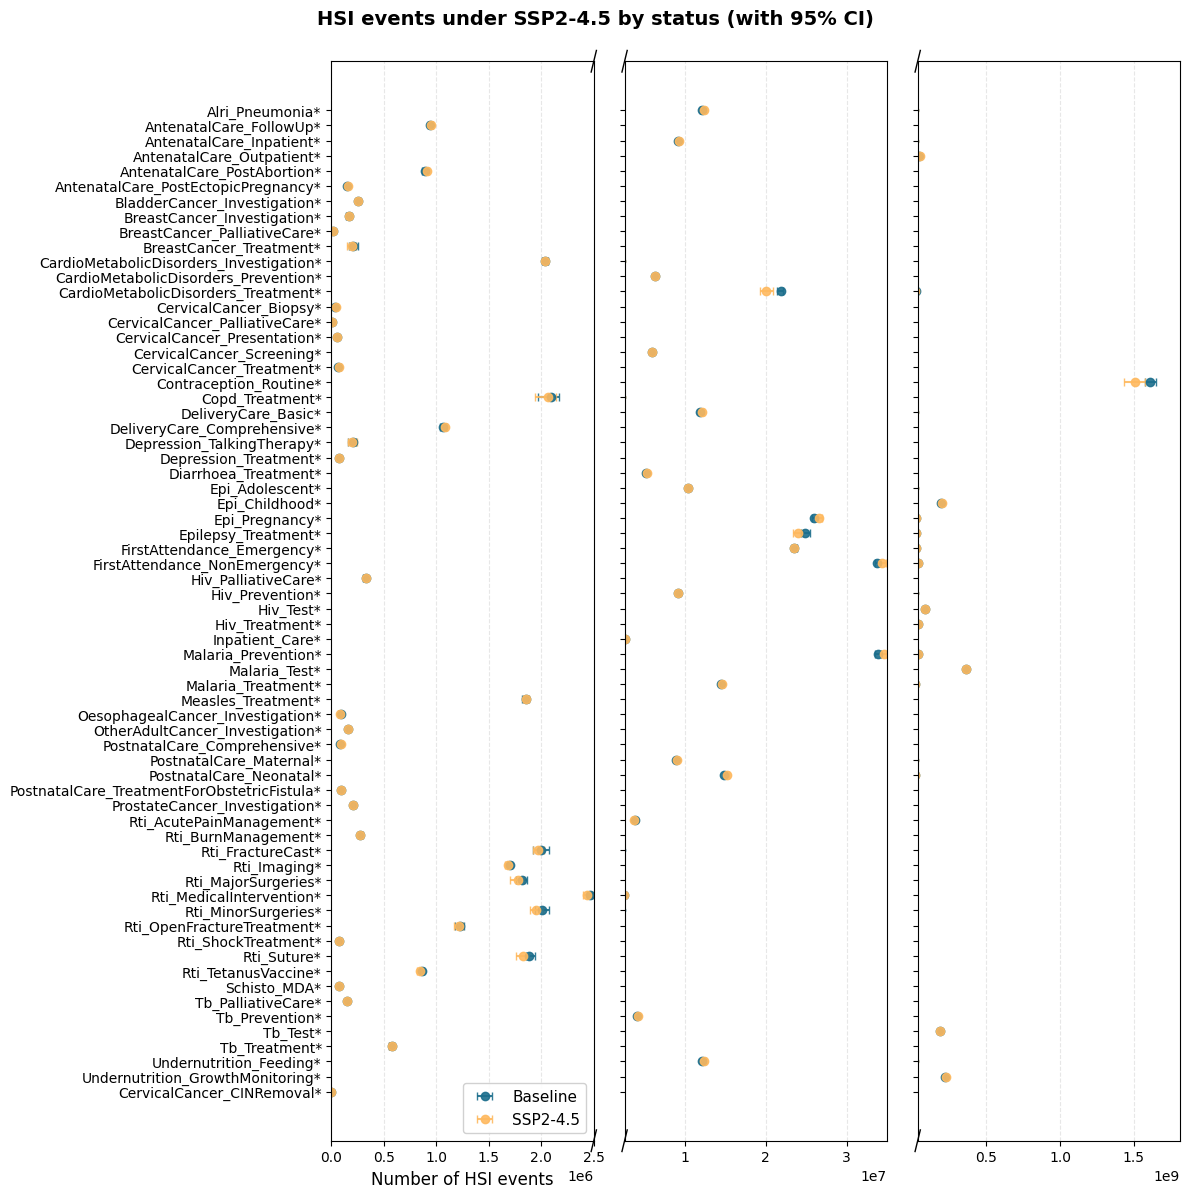

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 12), sharey=True)
fig.subplots_adjust(wspace=0.05)

y = np.arange(len(hsi))

# Define break points - adjust these based on your data
# Look at your data to find a good split
break_point_1 = 2.5e6   # Separates the bulk of treatments from high-volume ones
break_point_2 = 35e6    # Separates high-volume from extremely high-volume

# Calculate errors
baseline_errors = [
    merged['Baseline_Baseline_mean'] - merged['Baseline_Baseline_lower'],
    merged['Baseline_Baseline_upper'] - merged['Baseline_Baseline_mean']
]

ssp245_errors = [
    merged['Baseline_SSP245_mean'] - merged['Baseline_SSP245_lower'],
    merged['Baseline_SSP245_upper'] - merged['Baseline_SSP245_mean']
]

# Left panel (lower values)
ax1.errorbar(
    merged['Baseline_Baseline_mean'],
    y,
    xerr=baseline_errors,
    fmt='o',
    color='#1C6E8C',
    label='Baseline',
    alpha=0.9,
    markersize=6,
    capsize=3
)

ax1.errorbar(
    merged['Baseline_SSP245_mean'],
    y,
    xerr=ssp245_errors,
    fmt='o',
    color='#FEB95F',
    label='SSP2-4.5',
    alpha=0.9,
    markersize=6,
    capsize=3
)

ax1.set_xlim(0, break_point_1)
ax1.set_xlabel('Number of HSI events', fontsize=12)
ax1.set_yticks(y)
ax1.set_yticklabels(hsi, fontsize=10)
ax1.invert_yaxis()
ax1.grid(axis='x', alpha=0.3, linestyle='--')

# Right panel (higher values)
ax2.errorbar(
    merged['Baseline_Baseline_mean'],
    y,
    xerr=baseline_errors,
    fmt='o',
    color='#1C6E8C',
    alpha=0.9,
    markersize=6,
    capsize=3
)

ax2.errorbar(
    merged['Baseline_SSP245_mean'],
    y,
    xerr=ssp245_errors,
    fmt='o',
    color='#FEB95F',
    alpha=0.9,
    markersize=6,
    capsize=3
)

ax2.set_xlim(break_point_1, break_point_2)
ax2.set_xlabel('')
ax2.tick_params(labelleft=False)
ax2.grid(axis='x', alpha=0.3, linestyle='--')
# Rightmost 
ax3.errorbar(
    merged['Baseline_Baseline_mean'],
    y,
    xerr=baseline_errors,
    fmt='o',
    color='#1C6E8C',
    alpha=0.9,
    markersize=6,
    capsize=3
)

ax3.errorbar(
    merged['Baseline_SSP245_mean'],
    y,
    xerr=ssp245_errors,
    fmt='o',
    color='#FEB95F',
    alpha=0.9,
    markersize=6,
    capsize=3
)

ax3.set_xlim(break_point_2, merged[['Baseline_Baseline_upper', 'Baseline_SSP245_upper']].max().max() * 1.1)
ax3.set_xlabel('')
ax3.tick_params(labelleft=False)
ax3.grid(axis='x', alpha=0.3, linestyle='--')

# Add break marks
d = 0.01  # size of diagonal lines
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False, linewidth=1)
ax1.plot((1-d, 1+d), (-d, +d), **kwargs)
ax1.plot((1-d, 1+d), (1-d, 1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (-d, +d), **kwargs)
ax2.plot((-d, +d), (1-d, 1+d), **kwargs)

kwargs.update(transform=ax3.transAxes)
ax3.plot((-d, +d), (-d, +d), **kwargs)
ax3.plot((-d, +d), (1-d, 1+d), **kwargs)


# Legend and title
ax1.legend(loc='lower right', fontsize=11, framealpha=0.9)
fig.suptitle('HSI events under SSP2-4.5 by status (with 95% CI)', 
             fontsize=14, fontweight='bold', y=0.995)

plt.tight_layout()
plt.savefig('HSI_comparison_broken_axis_with_CI.png', dpi=300, bbox_inches='tight')
plt.show()

/var/folders/1z/j8w4v5lj4k580xt42fkwh7dw0000gn/T/ipykernel_58170/3201102566.py:143: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.98])


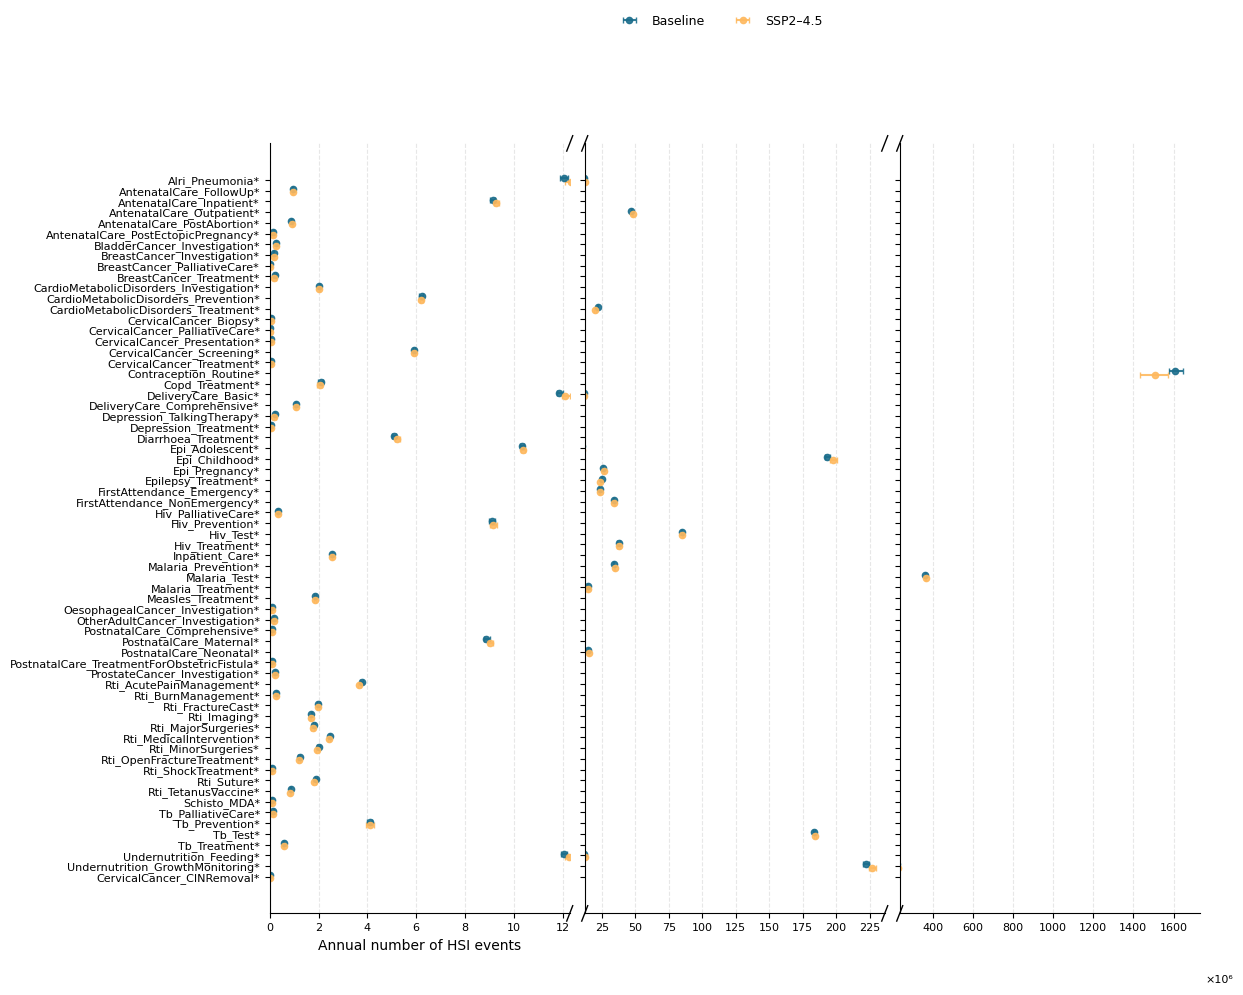

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

# --------------------
# Styling for papers
# --------------------
plt.rcParams.update({
    "font.size": 9,
    "axes.labelsize": 10,
    "axes.titlesize": 11,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "legend.fontsize": 9,
    "axes.spines.top": False,
    "axes.spines.right": False
})

# --------------------
# Data
# --------------------
y = np.arange(len(hsi))

baseline_errors = [
    merged['Baseline_Baseline_mean'] - merged['Baseline_Baseline_lower'],
    merged['Baseline_Baseline_upper'] - merged['Baseline_Baseline_mean']
]

ssp245_errors = [
    merged['Baseline_SSP245_mean'] - merged['Baseline_SSP245_lower'],
    merged['Baseline_SSP245_upper'] - merged['Baseline_SSP245_mean']
]

# --------------------
# Data-driven breakpoints (quantiles)
# --------------------
all_vals = np.concatenate([
    merged['Baseline_Baseline_mean'].values,
    merged['Baseline_SSP245_mean'].values
])

break_point_1 = np.quantile(all_vals, 0.75)
break_point_2 = np.quantile(all_vals, 0.97)

# --------------------
# Figure
# --------------------
fig, (ax1, ax2, ax3) = plt.subplots(
    1, 3, figsize=(12, 10), sharey=True,
    gridspec_kw={"wspace": 0.05}
)

# Horizontal dodge to reduce overlap
offset = 0.15

def plot_panel(ax):
    ax.errorbar(
        merged['Baseline_Baseline_mean'],
        y - offset,
        xerr=baseline_errors,
        fmt='o',
        color='#1C6E8C',
        markersize=4.5,
        capsize=2,
        alpha=0.9,
        label='Baseline'
    )
    ax.errorbar(
        merged['Baseline_SSP245_mean'],
        y + offset,
        xerr=ssp245_errors,
        fmt='o',
        color='#FEB95F',
        markersize=4.5,
        capsize=2,
        alpha=0.9,
        label='SSP2–4.5'
    )
    ax.grid(axis='x', linestyle='--', alpha=0.3)

# Panels
plot_panel(ax1)
plot_panel(ax2)
plot_panel(ax3)

ax1.set_xlim(0, break_point_1)
ax2.set_xlim(break_point_1, break_point_2)
ax3.set_xlim(
    break_point_2,
    merged[['Baseline_Baseline_upper', 'Baseline_SSP245_upper']].max().max() * 1.05
)

# Y-axis
ax1.set_yticks(y)
ax1.set_yticklabels(hsi)
ax1.invert_yaxis()

ax2.tick_params(labelleft=False)
ax3.tick_params(labelleft=False)

# Axis label
ax1.set_xlabel('Annual number of HSI events')
ax2.set_xlabel('')
ax3.set_xlabel('')

# Scientific formatter
formatter = FuncFormatter(lambda x, _: f'{x/1e6:.0f}')
for ax in (ax1, ax2, ax3):
    ax.xaxis.set_major_formatter(formatter)

ax3.text(
    1.02, -0.08, '×10⁶',
    transform=ax3.transAxes,
    ha='left', va='top', fontsize=8
)

# --------------------
# Break marks
# --------------------
d = 0.01
kwargs = dict(color='k', clip_on=False, linewidth=1)

for ax in (ax1, ax2):
    ax.plot((1-d, 1+d), (-d, +d), transform=ax.transAxes, **kwargs)
    ax.plot((1-d, 1+d), (1-d, 1+d), transform=ax.transAxes, **kwargs)

for ax in (ax2, ax3):
    ax.plot((-d, +d), (-d, +d), transform=ax.transAxes, **kwargs)
    ax.plot((-d, +d), (1-d, 1+d), transform=ax.transAxes, **kwargs)

# --------------------
# Legend
# --------------------
handles, labels = ax1.get_legend_handles_labels()
fig.legend(
    handles, labels,
    loc='upper center',
    ncol=2,
    frameon=False,
    bbox_to_anchor=(0.5, 1.02)
)

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig(
    'HSI_events_baseline_vs_ssp245_broken_axis.png',
    dpi=300,
    bbox_inches='tight'
)
plt.show()
